In [77]:
import pandas
import configparser
import psycopg2

In [78]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [79]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [80]:
sql_statemnet ="select * from student"

In [81]:
df=pandas.read_sql_query(sql_statemnet,conn)

df[:10]

,s_email,s_name,major
0,s4@jmu.edu,s4,ISAT
1,s2@jmu.edu,s2,IA
2,s1@jmu.edu,s1,IA
3,s3@jmu.edu,s3,ISAT
4,s5@jmu.edu,s5,GS
5,s6@jmu.edu,s6,IA


In [82]:
sql = """select professor.p_name,
                course.c_name
                from professor
                inner join course
                on professor.p_email=course.p_email"""

In [83]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,twitter
3,p3,postgresql


In [84]:
sql = """
      select count(*) as c_count, c_number
      from enroll
      group by c_number"""

<AxesSubplot:xlabel='c_number'>

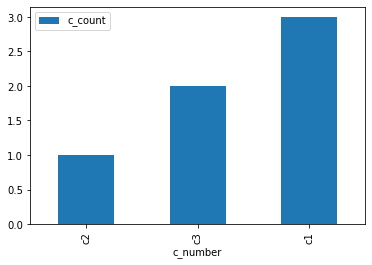

In [85]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x= 'c_number', y ='c_count')

In [88]:
sql_4 = """
select professor.p_name,count(*) as num_course
from professor 
inner join course 
on professor.p_email = course.p_email 
group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

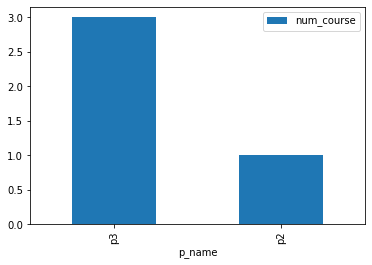

In [89]:
df=pandas.read_sql_query(sql_4,conn)

df.plot.bar(x='p_name',y='num_course')

In [90]:
sql_5 = """
insert into student(s_email,s_name,major)
values('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')

print(sql_5)


insert into student(s_email,s_name,major)
values('s5@jmu.edu','s5','GS')



In [91]:
cur=conn.cursor()

In [93]:
conn.commit()

In [94]:
conn.rollback()

In [95]:
df=pandas.read_sql_query('select * from student', conn)
df [:]

,s_email,s_name,major
0,s4@jmu.edu,s4,ISAT
1,s2@jmu.edu,s2,IA
2,s1@jmu.edu,s1,IA
3,s3@jmu.edu,s3,ISAT
4,s5@jmu.edu,s5,GS
5,s6@jmu.edu,s6,IA


In [96]:
sql_6 = """
    insert into professor (p_email,p_name,office)
    values('{}','{}','{}')
""".format('p4@jmu.,edu', 'p4','o4')

In [97]:
cur.execute(sql_6)

In [98]:
conn.commit()

In [99]:
df=pandas.read_sql_query('select * from professor', conn)
df [:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,"p4@jmu.,edu",p4,o4


In [100]:
df=pandas.read_sql_query('select * from course', conn)
df [:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c1,postgresql,r1,p3@jmu.edu


In [101]:
sql_7 = """
    insert into course(c_number,c_name,room,p_email)
    values('{}','{}','{}','{}')
""".format('c5', 'linkedin,','r2', 'p4@jmu.,edu')

In [102]:
cur.execute(sql_7)

In [103]:
conn.commit()

In [104]:
df=pandas.read_sql_query('select * from course', conn)
df [:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c1,postgresql,r1,p3@jmu.edu
4,c5,"linkedin,",r2,"p4@jmu.,edu"


In [109]:
sql_9 = """
    delete from professor 
    where p_email = '{}'
""".format('p2@jmu.edu')

In [110]:
cur.execute(sql_9)

In [111]:
conn.commit()

In [112]:
df=pandas.read_sql_query('select * from professor', conn)
df [:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,"p4@jmu.,edu",p4,o4


In [113]:
cur.close()
conn.close()